In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset from a CSV file
df = pd.read_csv('fitness.csv')

In [64]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [65]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [67]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [68]:
# Define the function to create age bins
def age_bin(age):
    if 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    elif 70 <= age <= 79:
        return '70-79'
    else:
        return 'Out of Range'

# Apply the function to the Age column
df['Age_Bin'] = df['Age'].apply(age_bin)

In [69]:
df.head(6)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Bin
0,14733363,male,68,190,94,29,105,40.8,231,60-69
1,14861698,female,20,166,60,14,94,40.3,66,20-29
2,11179863,male,69,179,79,5,88,38.7,26,60-69
3,16180408,female,34,179,71,13,100,40.5,71,30-39
4,17771927,female,27,154,58,10,81,39.8,35,20-29
5,15130815,female,36,151,50,23,96,40.7,123,30-39


In [70]:
df.groupby('Age_Bin').describe()

User_ID                                                       \
          count          mean           std         min          25%   
Age_Bin                                                                
20-29    4387.0  1.499524e+07  2.849897e+06  10006441.0  12535966.00   
30-39    3115.0  1.497801e+07  2.882964e+06  10001607.0  12490375.50   
40-49    2394.0  1.499614e+07  2.840211e+06  10007686.0  12541970.25   
50-59    2011.0  1.497499e+07  2.932847e+06  10006606.0  12409121.50   
60-69    1664.0  1.481226e+07  2.863349e+06  10001159.0  12343517.50   
70-79    1429.0  1.508517e+07  2.898177e+06  10013063.0  12492198.00   

                                                Age             ... Body_Temp  \
                50%         75%         max   count       mean  ...       75%   
Age_Bin                                                         ...             
20-29    15020614.0  17403811.0  19999647.0  4387.0  24.240255  ...      40.6   
30-39    15013894.0  17474614.0  19999394.0  3115.0  34.314928  ...      40.6   
40-49    15004620.5  17321044.0  19991370.0  2394.0  44.302423  ...      40.6   
50-59    14907694.0  17540576.5  19998603.0  2011.0  54.353555  ...      40.6   
60-69    14782197.0  17244693.5  19962435.0  1664.0  64.301082  ...      40.6   
70-79    15167230.0  17647344.0  19998753.0  1429.0  74.354094  ...      40.6   

              Calories                                                         
          max    count        mean        std  min   25%   50%     75%    max  
Age_Bin                                                                        
20-29    41.5   4387.0   78.978345  55.711067  1.0  30.0  69.0  122.00  240.0  
30-39    41.4   3115.0   85.050722  59.503615  1.0  31.5  75.0  132.00  289.0  
40-49    41.4   2394.0   90.267335  61.688001  2.0  35.0  82.0  140.00  280.0  
50-59    41.4   2011.0   95.216310  64.332094  2.0  37.5  87.0  146.00  276.0  
60-69    41.3   1664.0  103.331130  69.255071  3.0  42.0  93.0  158.25  300.0  
70-79    41.5   1429.0  106.479356  70.634968  3.0  46.0  96.0  162.00  314.0  

[6 rows x 64 columns]

In [71]:
# Define features for clustering
features = ['Duration','Calories']
X = df[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Define the range for k values
k_values = range(2, 5)  # You can adjust this range based on your needs
silhouette_scores = []
from sklearn.metrics import silhouette_score
import numpy as np
# Loop through different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f'Number of clusters: {k}, Silhouette Score: {score}')

# Find the best k
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters based on Silhouette Score: {best_k}')

Number of clusters: 2, Silhouette Score: 0.604990429835845
Number of clusters: 3, Silhouette Score: 0.5518522471830787
Number of clusters: 4, Silhouette Score: 0.5180205148330659
Optimal number of clusters based on Silhouette Score: 2


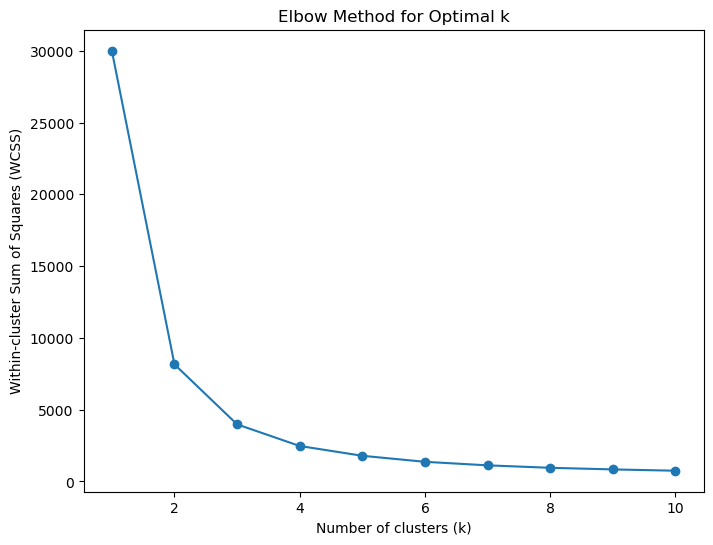

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range for k values
k_values = range(1, 11)  # You can adjust this range

# Calculate WCSS for each k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [74]:

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [75]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, df['KMeans_Cluster'])

0.604990429835845

In [76]:
df.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Bin,KMeans_Cluster
0,14733363,male,68,190,94,29,105,40.8,231,60-69,1
1,14861698,female,20,166,60,14,94,40.3,66,20-29,0


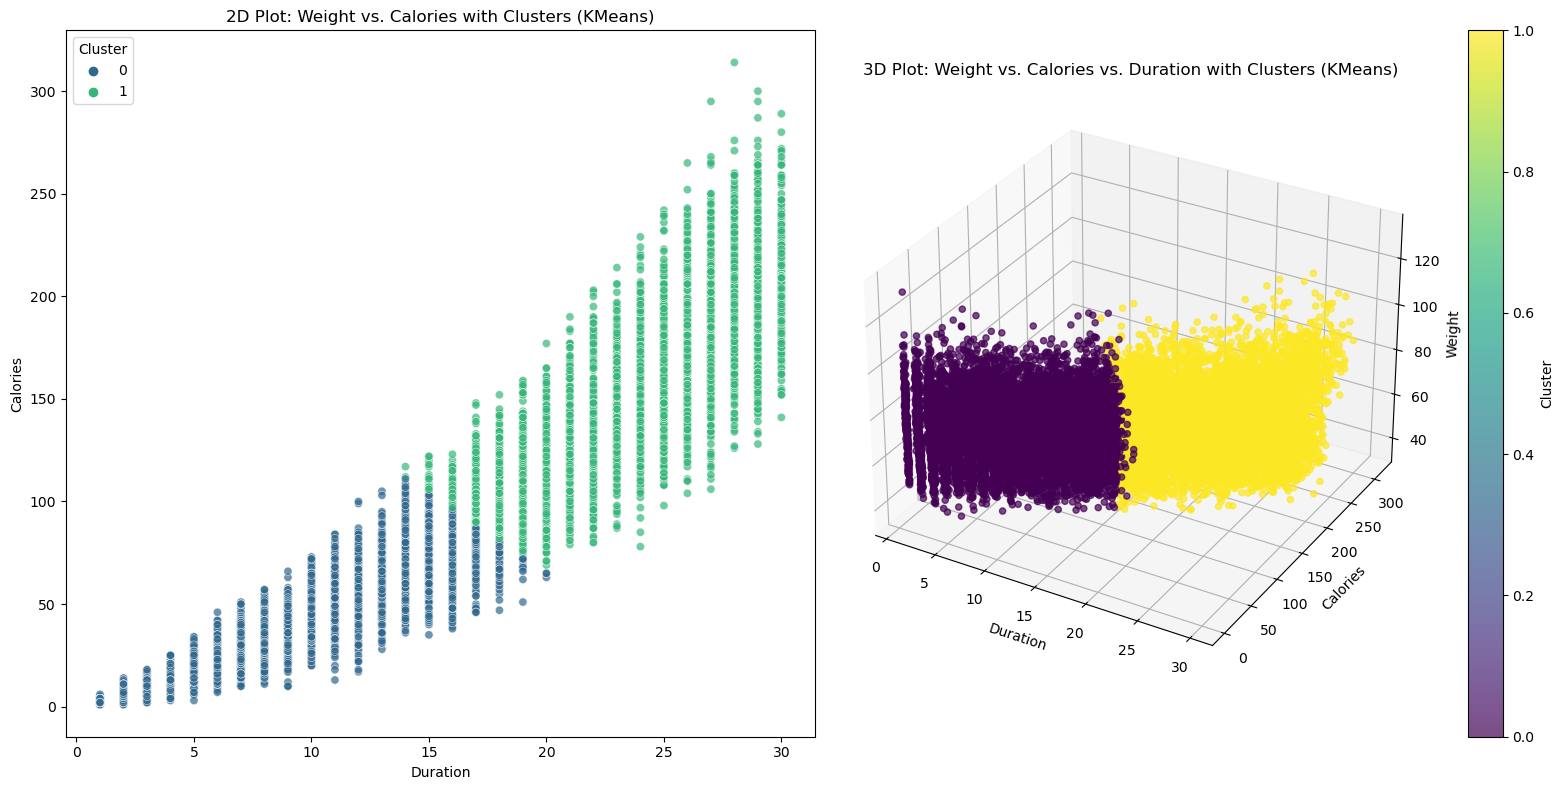

In [77]:

# Create subplots with one figure for 2D and another for 3D scatter plot
fig = plt.figure(figsize=(16, 8))

# 2D scatter plot
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x='Duration', y='Calories', hue=df['KMeans_Cluster'], data=df, palette='viridis', ax=ax1, alpha=0.7)
ax1.set_title('2D Plot: Weight vs. Calories with Clusters (KMeans)')
ax1.set_xlabel('Duration')
ax1.set_ylabel('Calories')
ax1.legend(title='Cluster')

# 3D scatter plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(df['Duration'], df['Calories'], df['Weight'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
fig.colorbar(scatter, ax=ax2, label='Cluster')
ax2.set_title('3D Plot: Weight vs. Calories vs. Duration with Clusters (KMeans)')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Calories')
ax2.set_zlabel('Weight')

# Show the plots
plt.tight_layout()
plt.show()

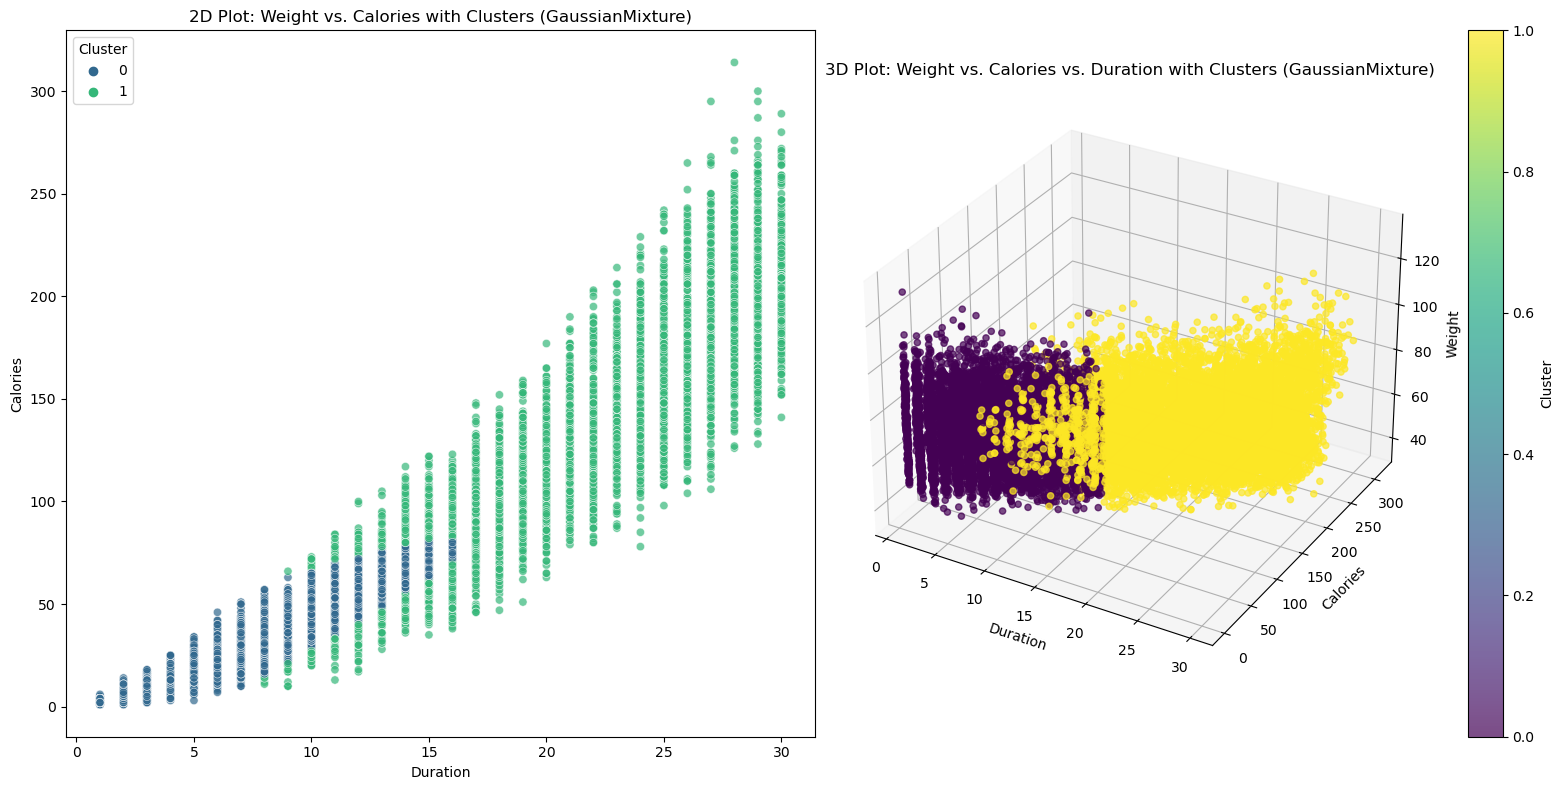

In [78]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)  # Adjust number of clusters as needed
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Create subplots with one figure for 2D and another for 3D scatter plot
fig = plt.figure(figsize=(16, 8))

# 2D scatter plot
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x='Duration', y='Calories', hue='GMM_Cluster', data=df, palette='viridis', ax=ax1, alpha=0.7)
ax1.set_title('2D Plot: Weight vs. Calories with Clusters (GaussianMixture)')
ax1.set_xlabel('Duration')
ax1.set_ylabel('Calories')
ax1.legend(title='Cluster')

# 3D scatter plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(df['Duration'], df['Calories'], df['Weight'], c=df['GMM_Cluster'], cmap='viridis', alpha=0.7)
fig.colorbar(scatter, ax=ax2, label='Cluster')
ax2.set_title('3D Plot: Weight vs. Calories vs. Duration with Clusters (GaussianMixture)')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Calories')
ax2.set_zlabel('Weight')

# Show the plots
plt.tight_layout()
plt.show()

In [79]:
df.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Bin,KMeans_Cluster,GMM_Cluster
0,14733363,male,68,190,94,29,105,40.8,231,60-69,1,1
1,14861698,female,20,166,60,14,94,40.3,66,20-29,0,0


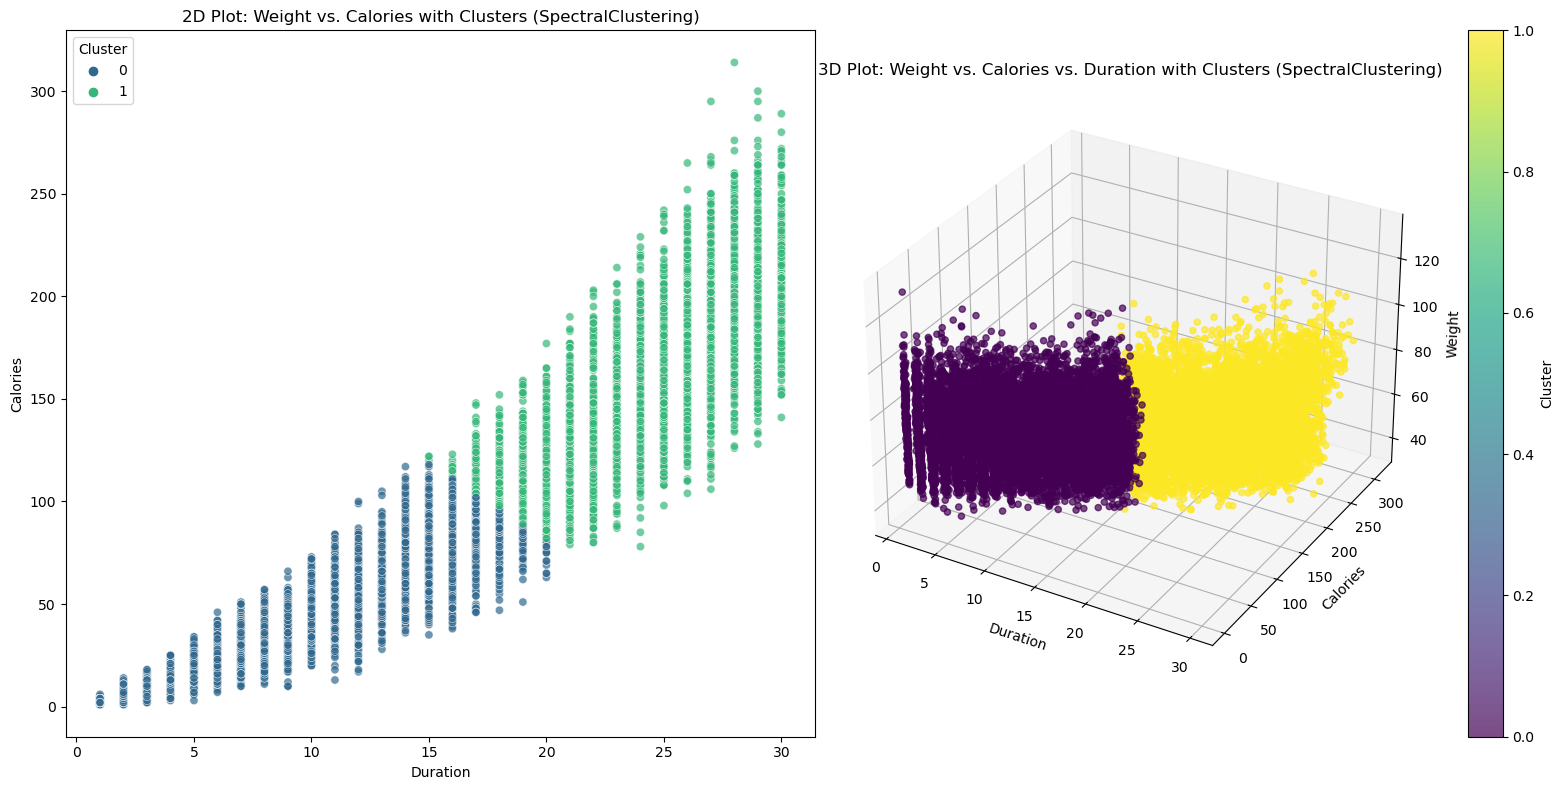

In [80]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, random_state=42)  # Adjust number of clusters as needed
df['Spectral_Cluster'] = spectral.fit_predict(X_scaled)

# Create subplots with one figure for 2D and another for 3D scatter plot
fig = plt.figure(figsize=(16, 8))

# 2D scatter plot
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x='Duration', y='Calories', hue='Spectral_Cluster', data=df, palette='viridis', ax=ax1, alpha=0.7)
ax1.set_title('2D Plot: Weight vs. Calories with Clusters (SpectralClustering)')
ax1.set_xlabel('Duration')
ax1.set_ylabel('Calories')
ax1.legend(title='Cluster')

# 3D scatter plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(df['Duration'], df['Calories'], df['Weight'], c=df['Spectral_Cluster'], cmap='viridis', alpha=0.7)
fig.colorbar(scatter, ax=ax2, label='Cluster')
ax2.set_title('3D Plot: Weight vs. Calories vs. Duration with Clusters (SpectralClustering)')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Calories')
ax2.set_zlabel('Weight')

# Show the plots
plt.tight_layout()
plt.show()


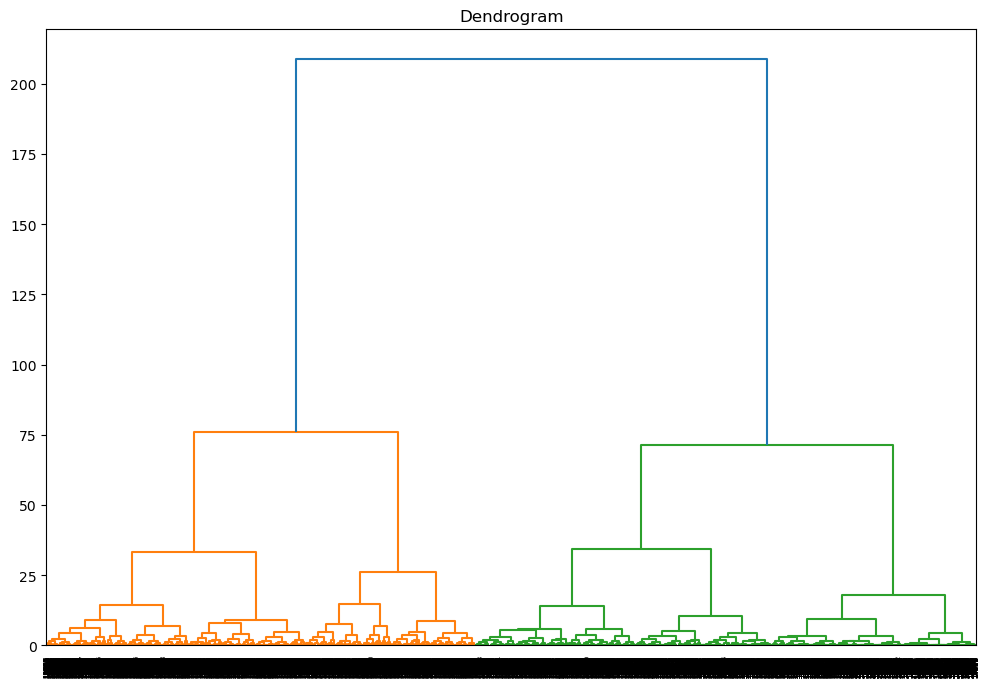

In [81]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)  # Adjust number of clusters as needed
df['hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

# Plot dendrogram
plt.figure(figsize=(12, 8))
linked = linkage(X_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()


In [101]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


In [102]:
df.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Bin,KMeans_Cluster,GMM_Cluster,Spectral_Cluster,hierarchical_Cluster,DBSCAN_Cluster
0,14733363,male,68,190,94,29,105,40.8,231,60-69,1,1,1,0,0
1,14861698,female,20,166,60,14,94,40.3,66,20-29,0,0,0,1,0


In [103]:
df.groupby('DBSCAN_Cluster').describe()

User_ID                                                       \
                  count          mean           std         min          25%   
DBSCAN_Cluster                                                                 
0               15000.0  1.497736e+07  2.872851e+06  10001159.0  12474190.75   

                                                         Age           ...  \
                       50%          75%         max    count     mean  ...   
DBSCAN_Cluster                                                         ...   
0               14997285.0  17449278.75  19999647.0  15000.0  42.7898  ...   

               Spectral_Cluster      hierarchical_Cluster                      \
                            75%  max                count      mean       std   
DBSCAN_Cluster                                                                  
0                           1.0  1.0              15000.0  0.539067  0.498488   

                                         
                min  25%  50%  75%  max  
DBSCAN_Cluster                           
0               0.0  0.0  1.0  1.0  1.0  

[1 rows x 96 columns]

In [97]:
df['DBSCAN_Cluster'].sum()

0

In [105]:
from sklearn.metrics import silhouette_score

kmeans_labels = df['KMeans_Cluster']
gmm_labels = df['GMM_Cluster']
spectral_labels = df['Spectral_Cluster']
hierarchical_labels=df['hierarchical_Cluster']


kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
hierarchical_silhouette=silhouette_score(X_scaled, hierarchical_labels)
# dbscan_silhouette = silhouette_score(X_scaled, df['DBSCAN_Cluster']) 

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"GMM Silhouette Score: {gmm_silhouette:.3f}")
print(f"Spectral Clustering Silhouette Score: {spectral_silhouette:.3f}")
print(f"Hierarchial Clustering Silhouette Score: {hierarchical_silhouette:.3f}")
# print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

K-Means Silhouette Score: 0.605
GMM Silhouette Score: 0.552
Spectral Clustering Silhouette Score: 0.603
Hierarchial Clustering Silhouette Score: 0.604


In [107]:
from sklearn.metrics import davies_bouldin_score

kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)
gmm_db = davies_bouldin_score(X_scaled, gmm_labels)
spectral_db = davies_bouldin_score(X_scaled, spectral_labels)
hierarchical_db=davies_bouldin_score(X_scaled, hierarchical_labels)

print(f"K-Means Davies-Bouldin Index: {kmeans_db:.3f}")
print(f"GMM Davies-Bouldin Index: {gmm_db:.3f}")
print(f"Spectral Clustering Davies-Bouldin Index: {spectral_db:.3f}")
print(f"hierarchical Clustering Davies-Bouldin Index: {hierarchical_db:.3f}")

K-Means Davies-Bouldin Index: 0.536
GMM Davies-Bouldin Index: 0.576
Spectral Clustering Davies-Bouldin Index: 0.534
hierarchical Clustering Davies-Bouldin Index: 0.537


In [108]:
from sklearn.metrics import calinski_harabasz_score

kmeans_ch = calinski_harabasz_score(X_scaled, kmeans_labels)
gmm_ch = calinski_harabasz_score(X_scaled, gmm_labels)
spectral_ch = calinski_harabasz_score(X_scaled, spectral_labels)
hierarchical_ch= calinski_harabasz_score(X_scaled, hierarchical_labels)

print(f"K-Means Calinski-Harabasz Index: {kmeans_ch:.2f}")
print(f"GMM Calinski-Harabasz Index: {gmm_ch:.2f}")
print(f"Spectral Clustering Calinski-Harabasz Index: {spectral_ch:.2f}")
print(f"Hierarchical Clustering Calinski-Harabasz Index: {hierarchical_ch:.2f}")


K-Means Calinski-Harabasz Index: 40155.29
GMM Calinski-Harabasz Index: 30977.17
Spectral Clustering Calinski-Harabasz Index: 39524.13
Hierarchical Clustering Calinski-Harabasz Index: 40066.20


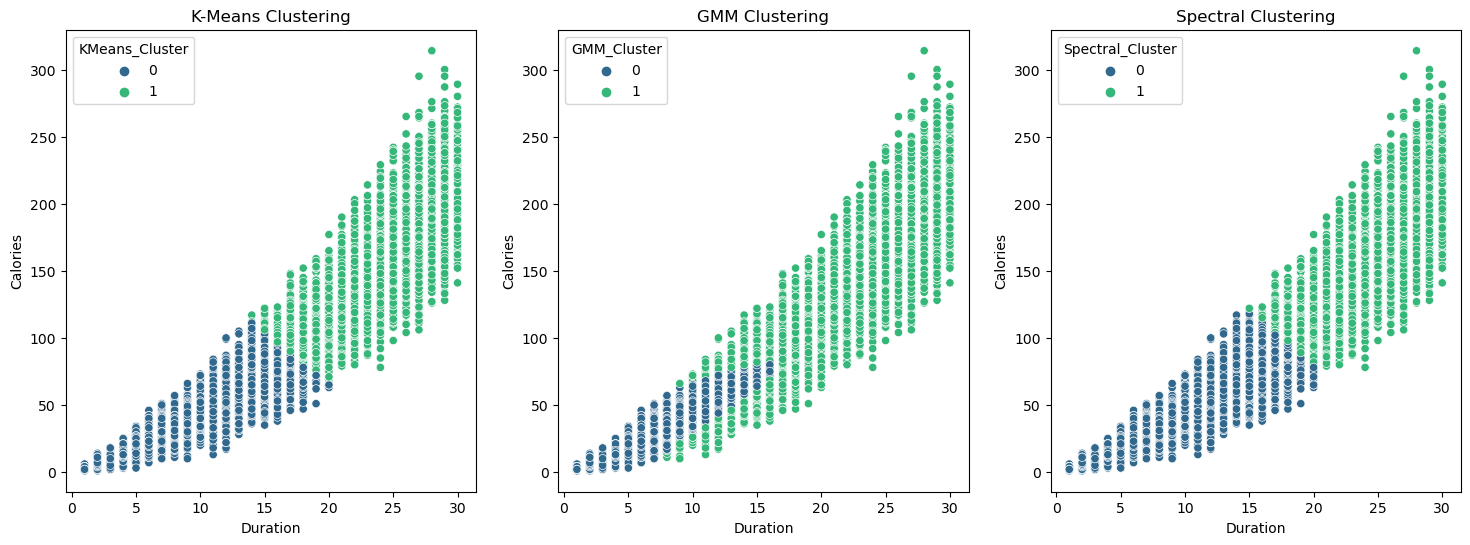

In [109]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Duration', y='Calories', hue=kmeans_labels, data=df, palette='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Duration', y='Calories', hue=gmm_labels, data=df, palette='viridis')
plt.title('GMM Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Duration', y='Calories', hue=spectral_labels, data=df, palette='viridis')
plt.title('Spectral Clustering')

plt.show()
